In [1]:
import numpy as np

In [101]:
data = 1.0 + np.random.randn(10) / 100
def grad(x):
    return data / (1 + np.exp(-x * data))

def hess_var(x, y):
    grad_x = grad(x)
    grad_y = grad(y)
    grad_diff = grad_x - grad_y
    var = np.mean(np.square(grad_diff)) - np.square(np.mean(grad_diff))
    return var

def lipt(x, y):
    grad_x = grad(x)
    grad_y = grad(y)
    grad_diff = grad_x - grad_y
    var = np.mean(np.square(grad_diff))
    return var

x = np.linspace(-10000, 10000, num=100)
y = np.linspace(-10000, 10000, num=100)

x, y = np.meshgrid(x, y)
z = np.zeros_like(x)
z_l = np.zeros_like(x)
for i in range(len(x)):
    for j in range(len(x[0])):
        z[i,j] = hess_var(x[i,j], y[i,j])
        z_l[i,j] = lipt(x[i,j], y[i,j])
# print(np.max(z))

<ipython-input-101-3bdcf526e063>:3: RuntimeWarning: overflow encountered in exp
  return data / (1 + np.exp(-x * data))


6.983541979765917e-05
1.016020539928564


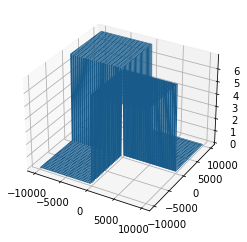

In [102]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
# z = np.linspace(0, 1, 100)
# x = z * np.sin(25 * z)
# y = z * np.cos(25 * z)
 
# plotting
print(np.max(z))
print(np.max(z_l))
ax.plot_surface(x, y, z)
plt.show()
ax.plot_surface(x, y, z_l)
plt.show()